In [1]:
import pandas as pd
import sys; sys.path.insert(0, '..')
from stattest import Analysis
from clustering import ClusteringPipe

df = pd.read_csv('data_processed.csv').sample(10000)
Class = pd.Categorical(df['class'])
y = pd.DataFrame({'class':Class.codes})
x_raw = df.drop([ 'class'], axis=1)
x_std = 
data = ClusteringPipe(x_raw, y)

<AxesSubplot:>

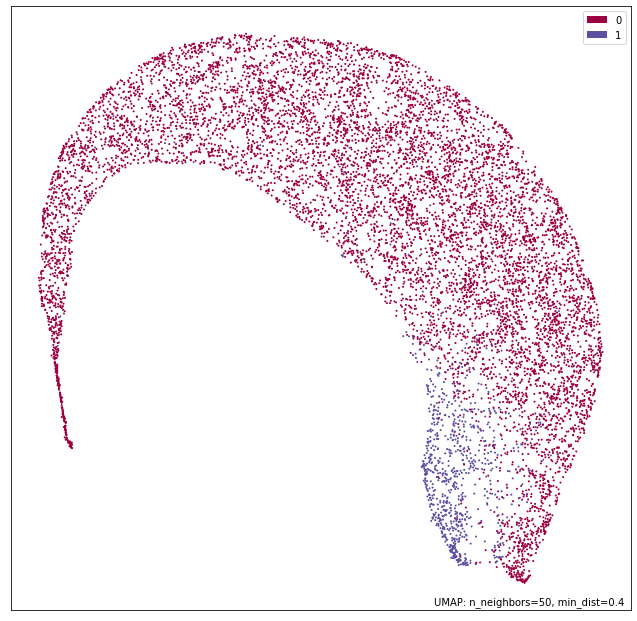

In [124]:
import umap
import umap.plot


mapper = umap.UMAP(n_neighbors=50, min_dist=0.4, negative_sample_rate=1, spread=0.9).fit(x_raw)
umap.plot.points(mapper, labels=Class)

## K-Means

### outlires removal

In [3]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

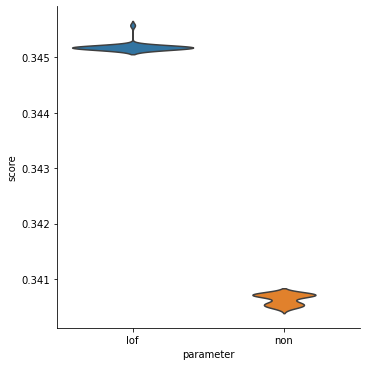

In [4]:
results.plot()

In [5]:
results.mean()

lof    0.345189
non    0.340635
dtype: float64

In [6]:
results.annova()

(42302.32694708958, 9.467467248012706e-85)

### dimension reduction method

In [7]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=5, random_state=i) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap']})

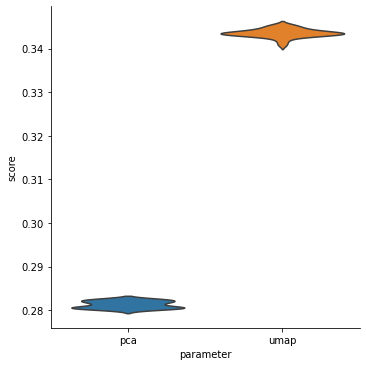

In [8]:
results.plot()

### number of clusters

detect potentially good k values with the elbow mehtod:

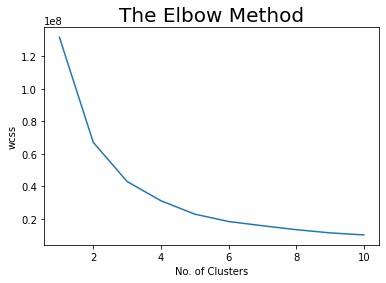

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_raw)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

now we will test which one is the best using the full process

In [10]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5) \
                    .cluster('kmeans', n_clusters=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [4,5,6,7]})

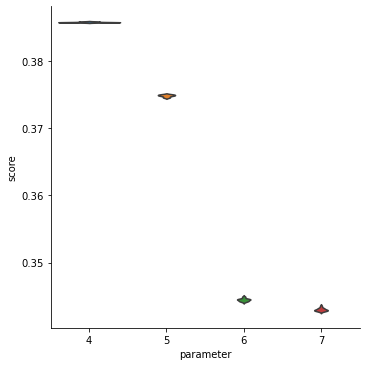

In [11]:
results.plot()

In [12]:
results.mean()

4    0.385787
5    0.374845
6    0.344478
7    0.343012
dtype: float64

In [13]:
results.annova()

(450517.8832047853, 1.2162235390061282e-235)

In [14]:
results.scheffe()

,4,5,6,7
4,1.000000e+00,2.566020e-156,3.381680e-223,5.908283e-225
5,2.566020e-156,1.000000e+00,1.066910e-207,4.489040e-210
6,3.381680e-223,1.066910e-207,1.000000e+00,1.011697e-57
7,5.908283e-225,4.489040e-210,1.011697e-57,1.000000e+00


### visualize cluster

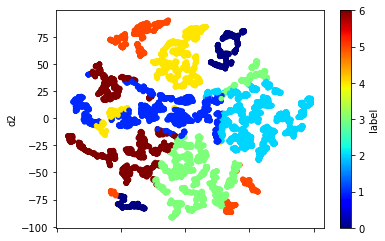

In [113]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=2) \
    .cluster('kmeans', n_clusters=7) \
    .visualize('tsne')

### corelationg with target class

In [20]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=2) \
    .score('v', label='class')

0.2661559992256881

In [131]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=2) \
    .score('v', label='class')

0.2661559992256881

## GMM

### outlires removal

In [22]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

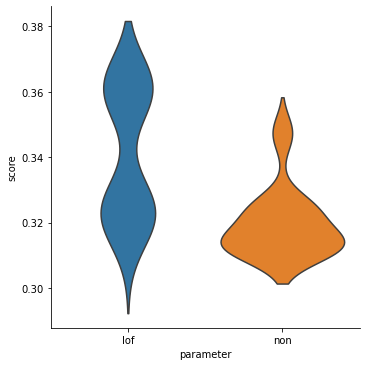

In [23]:
results.plot()

In [24]:
results.mean()

lof    0.340591
non    0.319889
dtype: float64

In [25]:
results.annova()

(25.763111100215493, 4.268059554334921e-06)

### Dimension Reduction Method

In [27]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce(p, n_components=5, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

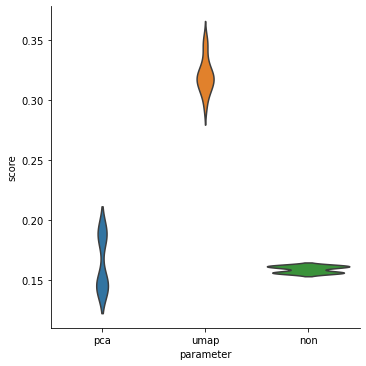

In [28]:
results.plot()

### Number of dimensions

In [29]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,20,30]})

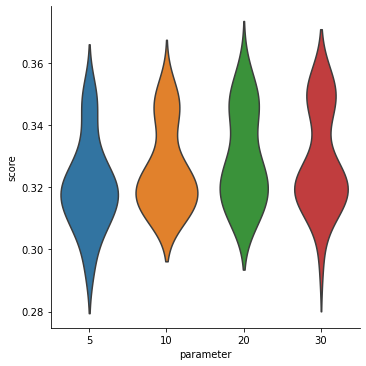

In [30]:
results.plot()

In [31]:
results.mean()

5     0.320714
10    0.325894
20    0.329338
30    0.328694
dtype: float64

In [32]:
results.annova()

(2.0944437944604117, 0.10475438868560215)

In [33]:
results.scheffe()

,5,10,20,30
5,1.000000,0.611435,0.17432,0.234175
10,0.611435,1.000000,0.84797,0.911393
20,0.174320,0.847970,1.00000,0.998750
30,0.234175,0.911393,0.99875,1.000000


### Coveriance Type

In [34]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=5) \
                    .cluster('gmm', n_components=6, covariance_type=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['spherical', 'tied', 'diag', 'full']
})

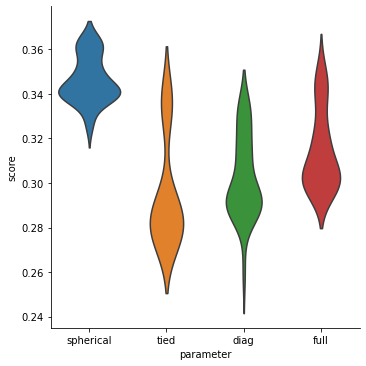

In [35]:
results.plot()

In [36]:
results.mean()

spherical    0.346206
tied         0.294659
diag         0.302409
full         0.314423
dtype: float64

In [37]:
results.annova()

(47.224328539473554, 5.0888646780531767e-20)

In [38]:
results.scheffe()

,spherical,tied,diag,full
spherical,1.000000e+00,5.149986e-18,3.518917e-14,1.629301e-08
tied,5.149986e-18,1.000000e+00,4.346727e-01,8.053470e-04
diag,3.518917e-14,4.346727e-01,1.000000e+00,9.112216e-02
full,1.629301e-08,8.053470e-04,9.112216e-02,1.000000e+00


### number of clusters

detect potentially good k values with the elbow mehtod:

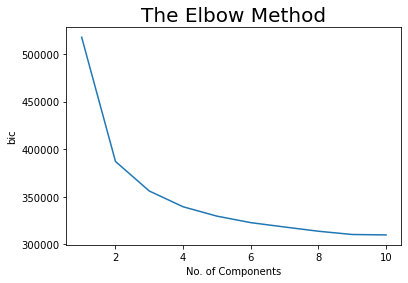

In [39]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(x_raw)
    bic.append(gmm.bic(x_raw))
    
plt.plot(range(1, 11), bic)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Components')
plt.ylabel('bic')
plt.show()

now we will test which one is the best using the full process

In [40]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=5) \
                    .cluster('gmm', n_components=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [3,4,5,6,7,8]})

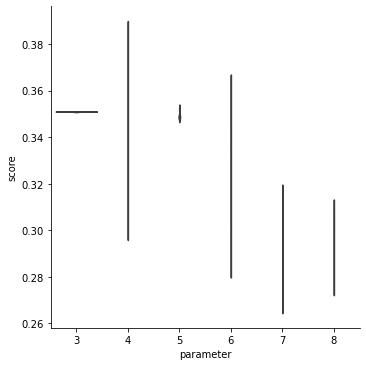

In [41]:
results.plot()

In [42]:
results.mean()

3    0.350988
4    0.352650
5    0.349291
6    0.314423
7    0.293650
8    0.298135
dtype: float64

In [43]:
results.annova()

(130.4635053469062, 6.009957628069012e-57)

In [44]:
results.scheffe()

,3,4,5,6,7,8
3,1.000000e+00,9.986659e-01,9.985212e-01,1.551197e-17,1.843333e-34,7.910389e-31
4,9.986659e-01,1.000000e+00,9.652840e-01,7.253133e-19,8.588968e-36,3.519624e-32
5,9.985212e-01,9.652840e-01,1.000000e+00,3.413938e-16,4.309738e-33,1.926419e-29
6,1.551197e-17,7.253133e-19,3.413938e-16,1.000000e+00,2.857421e-06,6.773177e-04
7,1.843333e-34,8.588968e-36,4.309738e-33,2.857421e-06,1.000000e+00,8.866578e-01
8,7.910389e-31,3.519624e-32,1.926419e-29,6.773177e-04,8.866578e-01,1.000000e+00


### Cluster visualisation 

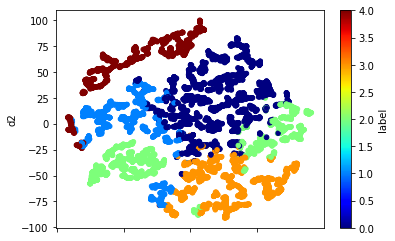

In [114]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=5) \
    .visualize('tsne')

### corelationg with target class

In [126]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=2) \
    .score('v', label='class')

0.3449835414910746

## Louvaine

### outlires removal

In [71]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

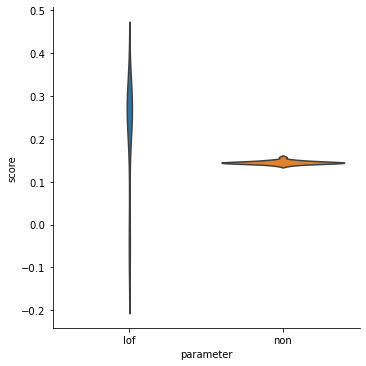

In [72]:
results.plot()

In [73]:
results.mean()

lof    0.213375
non    0.145179
dtype: float64

In [74]:
results.annova()

(8.84697840249886, 0.004272942076756487)

### Dimension Reduction Method

In [75]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=5, random_state=i) \
                    .cluster('louvain') \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

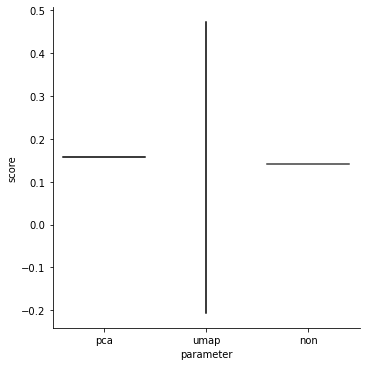

In [76]:
results.plot()

### Number of dimensions

In [77]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,7,8]})

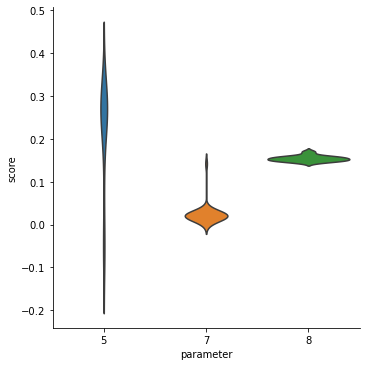

In [78]:
results.plot()

In [79]:
results.mean()

5    0.213375
7    0.024224
8    0.154709
dtype: float64

In [80]:
results.annova()

(51.64248206225127, 1.6405630520278167e-15)

In [81]:
results.scheffe()

,5,7,8
5,1.000000e+00,4.910316e-15,1.111819e-02
7,4.910316e-15,1.000000e+00,7.151760e-09
8,1.111819e-02,7.151760e-09,1.000000e+00


### Modularity Type

In [82]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('louvain', modularity=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['dugue', 'newman', 'potts']
})

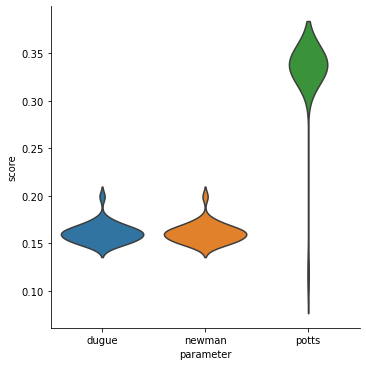

In [83]:
results.plot()

In [84]:
results.mean()

dugue     0.161034
newman    0.161034
potts     0.330670
dtype: float64

In [85]:
results.annova()

(468.2862627002502, 2.684896289673138e-47)

### Cluster visualisation 

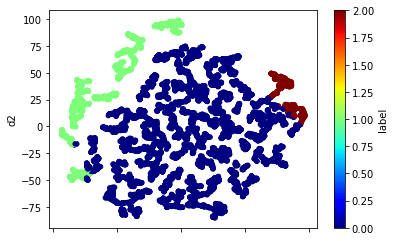

In [86]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='potts') \
    .visualize('tsne')

### corelationg with target class

In [87]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('louvain', modularity='newman') \
    .score('v', label='class')

0.10844446386074505

In [92]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('louvain', modularity='newman') \
    .score('v', label='class')

0.10844446386074505

## Prim

### outlires removal

In [96]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('prim', cutoff_scale=0.1) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

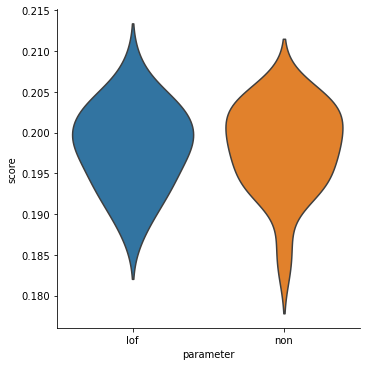

In [97]:
results.plot()

In [98]:
results.mean()

lof    0.198248
non    0.198050
dtype: float64

In [99]:
results.annova()

(0.02132155204394001, 0.8844126972971418)

### Dimension Reduction Method

In [125]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=4, random_state=i) \
                    .cluster('prim', cutoff_scale=0.2) \
                    .score('silhouette').mean()\
                   for i in range(10)] \
                for p in ['pca', 'umap', 'non']})

In [ ]:
results.plot()

### Number of dimensions

In [ ]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('prim', cutoff_scale=0.8) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,6,7]})

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

In [ ]:
results.scheffe()

### Cutoff Scale

In [ ]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('prim', cutoff_scale=p) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [0.6, 0.7]
})

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

### Cluster visualisation 

In [ ]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .visualize('tsne')

### corelationg with target class

In [130]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='class')

1.4678799672163496e-15

In [129]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='class')

1.4678799672163496e-15

## DBSCAN

### outlires removal

In [106]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=0.4, min_samples=3) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

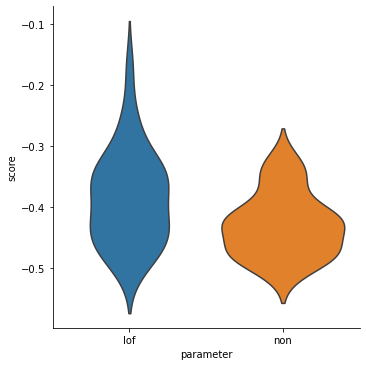

In [107]:
results.plot()

In [108]:
results.mean()

lof   -0.384281
non   -0.428439
dtype: float64

In [109]:
results.annova()

(6.893574809112777, 0.011043264981169252)

### Number of dimensions

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

In [ ]:
results.scheffe()

### Epsilon and Min samples

In [ ]:
import itertools
results = Analysis({f'{eps}_{mins}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=mins) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps, mins in itertools.product([0.25,0.5,0.75], [4,5,6])
})

In [ ]:
results.plot()

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

In [ ]:
results.scheffe()

### Epsilon

In [ ]:
import itertools
results = Analysis({f'{eps}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps in [0.25,0.5, 0.75, 0.9] \
})

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

In [ ]:
results.scheffe()

### Min Samples

In [ ]:
import itertools
results = Analysis({f'{m}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=0.9, min_samples=m) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for m in [4,5,6,7,11] \
})

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

In [ ]:
results.scheffe()

### Cluster visualisation 

In [ ]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=5) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .visualize('tsne')

### corelationg with target class

In [127]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='class')

1.4678799672163496e-15

In [128]:
data.normalize('std') \
    .reduce('umap', n_components=2) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='class')

1.4678799672163496e-15

## Cross methods

In [ ]:
results = Analysis({
   'dbscan':[data.normalize('std') \
                  .remove_outlires('lof') \
                  .reduce('umap', n_components=5, random_state=i) \
                  .cluster('dbscan', eps=0.75, min_samples=5) \
                  .score('silhouette').mean() for i in range(30)], \
    'prim': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('prim', cutoff_scale=0.8) \
                 .score('silhouette').mean() for i in range(30)], \
    'louvain': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('louvain', modularity='newman') \
                 .score('silhouette').mean() for i in range(30)], \
    'gmm': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('gmm', n_components=7) \
                 .score('silhouette').mean() for i in range(30)], \
    'kmeans': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('kmeans', n_clusters=7) \
                 .score('silhouette').mean() for i in range(30)], \
               
})

In [ ]:
results.plot()

In [ ]:
results.mean()

In [ ]:
results.annova()

In [ ]:
results.scheffe()